<a href="https://colab.research.google.com/github/pankajbonde/DataScience/blob/main/Logistic_regression_predecting_tobuyProduct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing Library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
from google.colab import files
uploaded = files.upload()

Saving User_Data.csv to User_Data (1).csv


In [ ]:
dataset = pd.read_csv("User_Data.csv")

In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:,4].values

In [ ]:
from sklearn.model_selection import train_test_split
xtest, xtrain, ytest, ytrain = train_test_split(x,y, test_size=0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

print(xtrain[0:10, :])

[[-0.54748976  0.5130727 ]
 [ 0.15442019 -0.61825566]
 [-0.10879604  0.14615539]
 [-0.54748976  0.26846116]
 [-0.10879604 -0.61825566]
 [-0.81070599 -1.53554892]
 [-0.45975102 -1.68843113]
 [-0.0210573   2.25592989]
 [-1.60035469 -0.0678797 ]
 [ 0.94406888 -0.83229075]]


# we are training our Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

#After training the model, it time to use it to do prediction on testing data

In [ ]:
y_pred = classifier.predict(xtest)



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)

print("Confusion Matrix : \n ",cm)

Confusion Matrix : 
  [[173  16]
 [ 38  73]]


Out of 300 : 
TruePostive + TrueNegative = 173 + 73 
FalsePositive + FalseNegative = 16 + 38
Performance measure – Accuracy 

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy : ",accuracy_score(ytest, y_pred))

Accuracy :  0.82


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


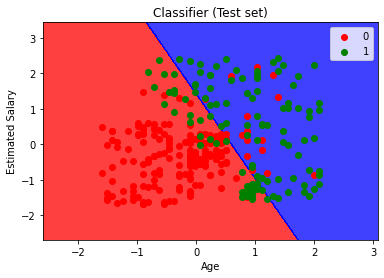

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
							stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
							stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(
			np.array([X1.ravel(), X2.ravel()]).T).reshape(
			X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green'))(i), label = j)
	
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
